# TABLE OF CONTENTS

## 1. Import libraries and data

## 2. Security implications

## 3. Regional segmentation

## 4. Low-activity customers

## 5. Customer profiling and charts

## 6. Aggregations

# 7. Export

# 1. Import libraries and data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path
path = r'C:\Users\opetr\Documents\Instacart Basket Analysis'

In [4]:
# Import the most recent dataset
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_df.pkl'))

# 2. Security implications

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,loyalty_flag,average_price,spending_flag,order_frequency_flag,gender,state,age,nr_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423


###### The only PII data provided were in the first_name and last_name columns. In order to decrease the size of the dataframe and because this information was not relevant to the analysis, these columns were dropped in the last exercise.

# 3. Regional segmentation

### Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [6]:
# Define regions
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [7]:
# Create a list using for-loop
region = []

for value in instacart['state']:
    if value in northeast:
        region.append('Northeast')
    elif value in midwest:
        region.append('Midwest')
    elif value in south:
        region.append('South')
    elif value in west:
        region.append('West')

In [8]:
# Check output
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [9]:
# Incorporate results in df as a new column
instacart['region'] = region

In [10]:
# Check output
instacart['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [11]:
pd.crosstab(instacart['spending_flag'], instacart['region'], dropna = False)

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


##### Each U.S. region has comparable spending habits, with high spenders accounting for around 2% of the total customer count.

# 4. Low-activity customers

### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [12]:
# Create a max_order column
instacart['max_order'] = instacart.groupby(['user_id'])['order_number'].transform(np.max)

In [13]:
# Check output
instacart.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,loyalty_flag,average_price,spending_flag,order_frequency_flag,gender,state,age,nr_of_dependents,marital_status,income,region,max_order
0,2539329,1,1,2,8,NaN,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
1,2398795,1,2,3,7,15.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
2,473747,1,3,3,12,21.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
3,2254736,1,4,4,7,29.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
4,431534,1,5,4,15,28.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
5,3367565,1,6,2,7,19.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
6,550135,1,7,1,9,20.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
7,3108588,1,8,1,14,14.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
8,2295261,1,9,1,16,0.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10
9,2550362,1,10,4,8,30.0,7,9.0,New customer,6.367797,Low spender,Non-frequent customer,Female,Alabama,31,3,married,40423,South,10


In [14]:
# Create conditions for deriving a new column
instacart.loc[instacart['max_order'] >= 5, 'activity_flag'] = 'normal_activity'
instacart.loc[instacart['max_order'] < 5, 'activity_flag'] = 'low_activity'

In [15]:
# Check frequency
instacart['activity_flag'].value_counts(dropna = False)

normal_activity    30964564
low_activity        1440295
Name: activity_flag, dtype: int64

In [16]:
# Create a new df containing only normal_activity
df = instacart[instacart['activity_flag'] == 'normal_activity']

In [17]:
# Create a new df containing only low_activity
low_activity_customers = instacart[instacart['activity_flag'] == 'low_activity']

In [18]:
# Export new df
low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

# 5. Customer profiling and charts

### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. Create an appropriate visualization to show the distribution of profiles. Produce suitable charts to illustrate your results and export them in your project folder.

## Pie chart

In [19]:
# Create an if-statement for the baby department
parent = []

for value in df['department_id']:
    if value == 18:
        parent.append('Young Adult')
    else:
        parent.append('Single Adult')

In [20]:
# Create column
df['parent'] = parent

C:\Users\opetr\AppData\Local\Temp\ipykernel_1580\3129912841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parent'] = parent


Text(0.5, 1.0, 'Parent Ratio')

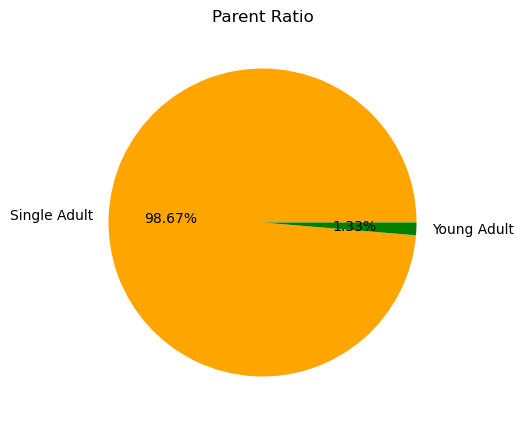

In [21]:
# Create pie chart
pie_1 = df['parent'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize=(5,5), colors =['orange', 'green'], subplots = True)
plt.ylabel("")
plt.title('Parent Ratio')

In [22]:
# Export pie chart
pie_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_pie.png'))

AttributeError: 'numpy.ndarray' object has no attribute 'figure'

## Scatterplot

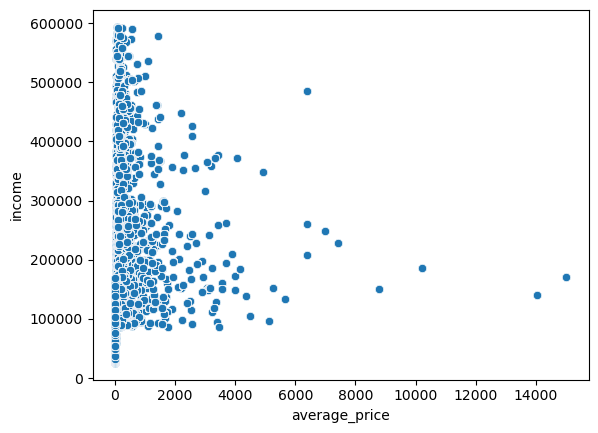

In [23]:
# Create scatterplot
splot_1 = sns.scatterplot(x = 'average_price', y = 'income', data = df)

In [24]:
# Export scatterplot
splot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_income_price.png'))

## Bar charts (4)

### 1. Age group / Shopping time

#### Create if-statement for the age group

In [25]:
# Condition 1
df.loc[df['age'] < 25, 'age_group'] = 'Young'

C:\Users\opetr\AppData\Local\Temp\ipykernel_1580\3998675617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['age'] < 25, 'age_group'] = 'Young'


In [26]:
# Condition 2
df.loc[(df['age'] >= 25) & (df['age'] < 65), 'age_group'] = 'Adult'

In [27]:
# Condition 3
df.loc[df['age'] >= 55, 'age_group'] = 'Senior'

In [28]:
# Check output
df['age_group'].value_counts(dropna = False)

Adult     14551339
Senior    12998031
Young      3415194
Name: age_group, dtype: int64

#### Create if-statement for shopping time

In [29]:
# Condition 1
df.loc[(df['order_hour_of_day'] >= 6) & (df['order_hour_of_day'] <= 9), 'shop_time'] = 'Early Bird'

C:\Users\opetr\AppData\Local\Temp\ipykernel_1580\2671808197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['order_hour_of_day'] >= 6) & (df['order_hour_of_day'] <= 9), 'shop_time'] = 'Early Bird'


In [30]:
# Condition 2
df.loc[(df['order_hour_of_day'] >= 20), 'shop_time'] = 'Night Owl'

In [31]:
# Check output
df['shop_time'].value_counts(dropna = False)

NaN           23111983
Early Bird     5166947
Night Owl      2685634
Name: shop_time, dtype: int64

In [32]:
# Check for consistency
df['order_hour_of_day'].shape

(30964564,)

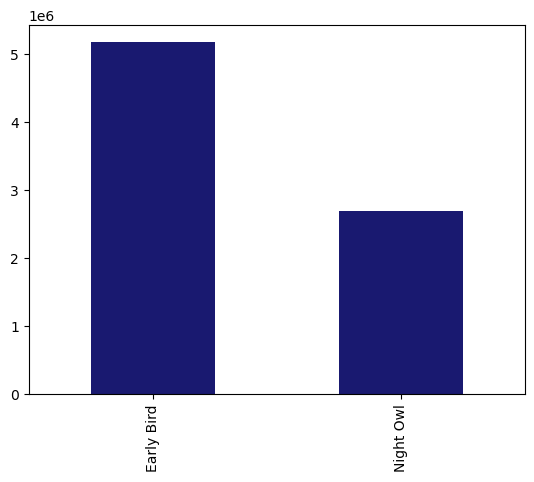

In [33]:
# Create bar chart 1
bar_1 = df['shop_time'].value_counts().plot.bar(color = 'midnightblue')

In [34]:
# Export bar chart
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_1.png'))

In [35]:
# Cross variables
shop_time_age = pd.crosstab(df['shop_time'], df['age_group'], normalize = 'index')

Text(0.5, 0, 'Customer shopping time')

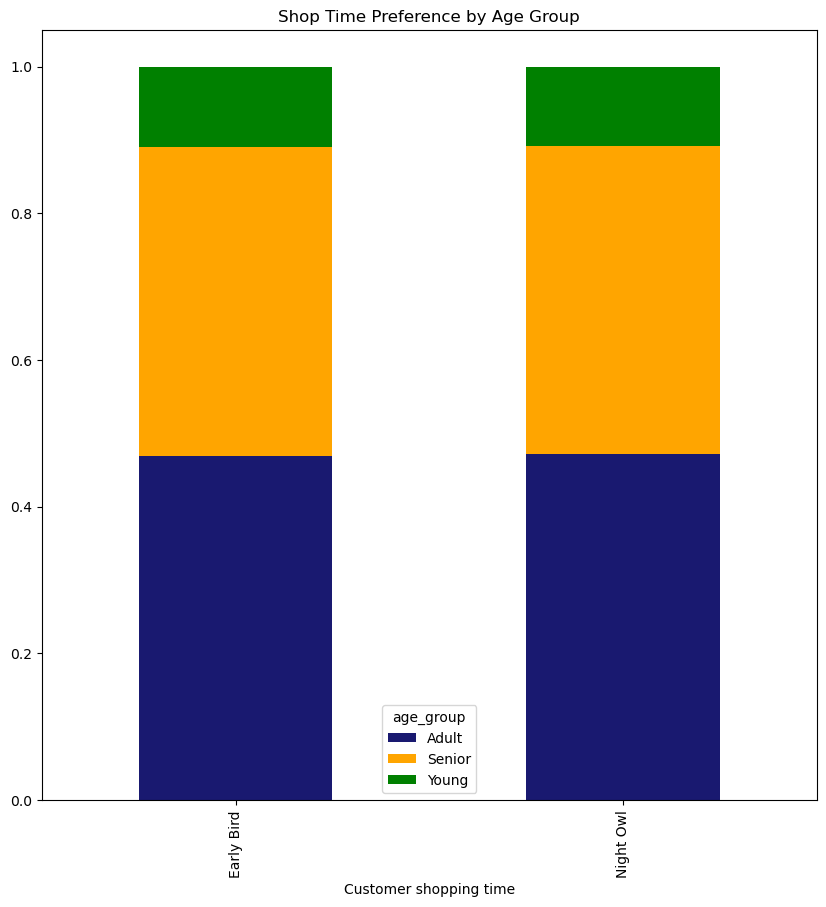

In [36]:
# Create bar chart 2
bar_2 = shop_time_age.plot(kind = 'bar', color = ['midnightblue', 'orange', 'green'], stacked = True, figsize = (10,10))

plt.title('Shop Time Preference by Age Group')
plt.xlabel('Customer shopping time')

In [37]:
# Export bar chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_2.png'))

### 2. Caregivers / Spending flag

#### Create if-statement for caregivers

In [38]:
# Condition 1
df.loc[df['nr_of_dependents'] >= 1, 'caregiver'] = 'Caregiver'

C:\Users\opetr\AppData\Local\Temp\ipykernel_1580\4086748018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['nr_of_dependents'] >= 1, 'caregiver'] = 'Caregiver'


In [39]:
# Condition 2
df.loc[df['nr_of_dependents'] < 1, 'caregiver'] = 'Single'

In [40]:
# Check output
df['caregiver'].value_counts(dropna = False)

Caregiver    23224883
Single        7739681
Name: caregiver, dtype: int64

In [41]:
# Check for consistency
df['nr_of_dependents'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: nr_of_dependents, dtype: int64

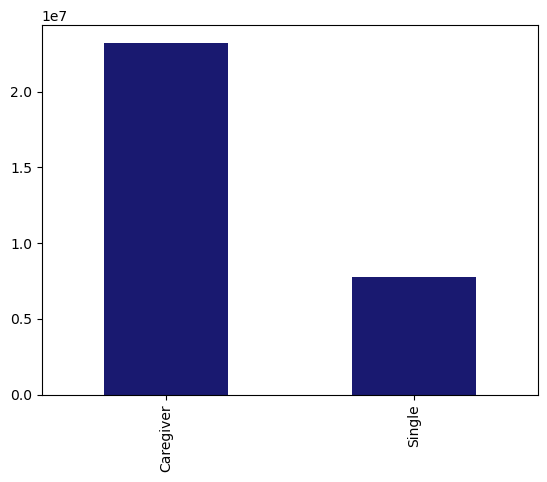

In [42]:
# Create bar chart 3
bar_3 = df['caregiver'].value_counts().plot.bar(color = 'midnightblue')

In [43]:
# Export bar chart
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_3.png'))

In [44]:
# Cross variables
care_spend = pd.crosstab(df['caregiver'], df['spending_flag'], normalize = 'index')

Text(0.5, 0, 'Caregiver status')

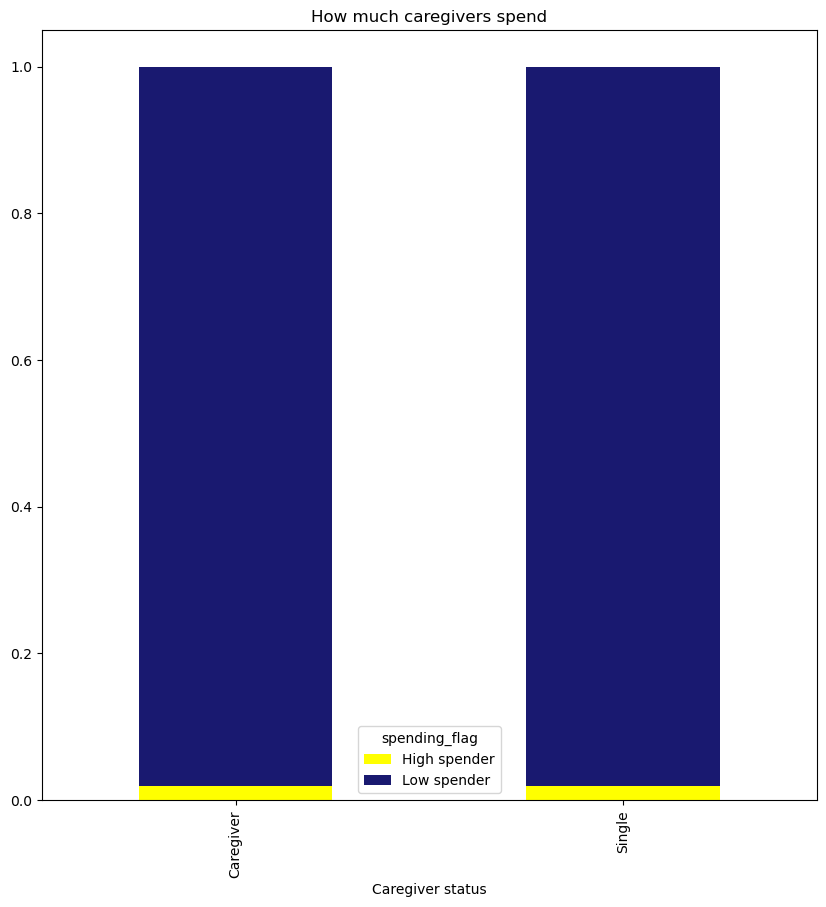

In [45]:
# Create bar chart 4
bar_4 = care_spend.plot(kind = 'bar', color = ['yellow', 'midnightblue'], stacked = True, figsize = (10,10))

plt.title('How much caregivers spend')
plt.xlabel('Caregiver status')

In [46]:
# Export bar chart
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_4.png'))

### 3. Vegan / Region

In [47]:
# Create a list using a for-loop
vegan = []

for value in df["department_id"]:
  if value in [12,16]:
    vegan.append("Vegan")
  else:
    vegan.append("Non-vegan")

In [48]:
# Incorporate results in df as a new column
df['vegan'] = vegan

C:\Users\opetr\AppData\Local\Temp\ipykernel_1580\3527327950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vegan'] = vegan


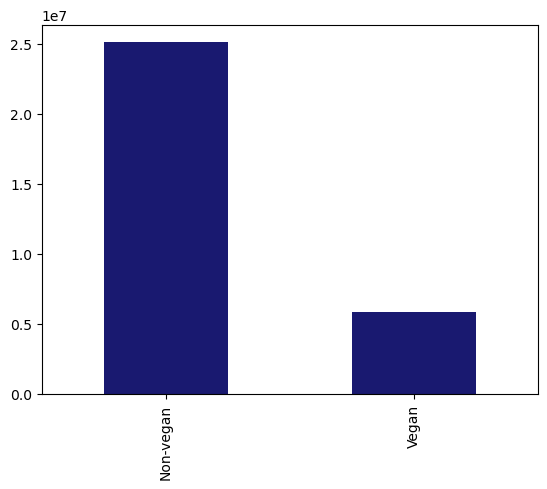

In [49]:
# Create bar chart 5
bar_5 = df['vegan'].value_counts().plot.bar(color = 'midnightblue')

In [50]:
# Export bar chart
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_5.png'))

In [51]:
# Cross variables
vegan_region = pd.crosstab(df['vegan'], df['region'], normalize = 'index')

Text(0.5, 0, 'U.S. Regions')

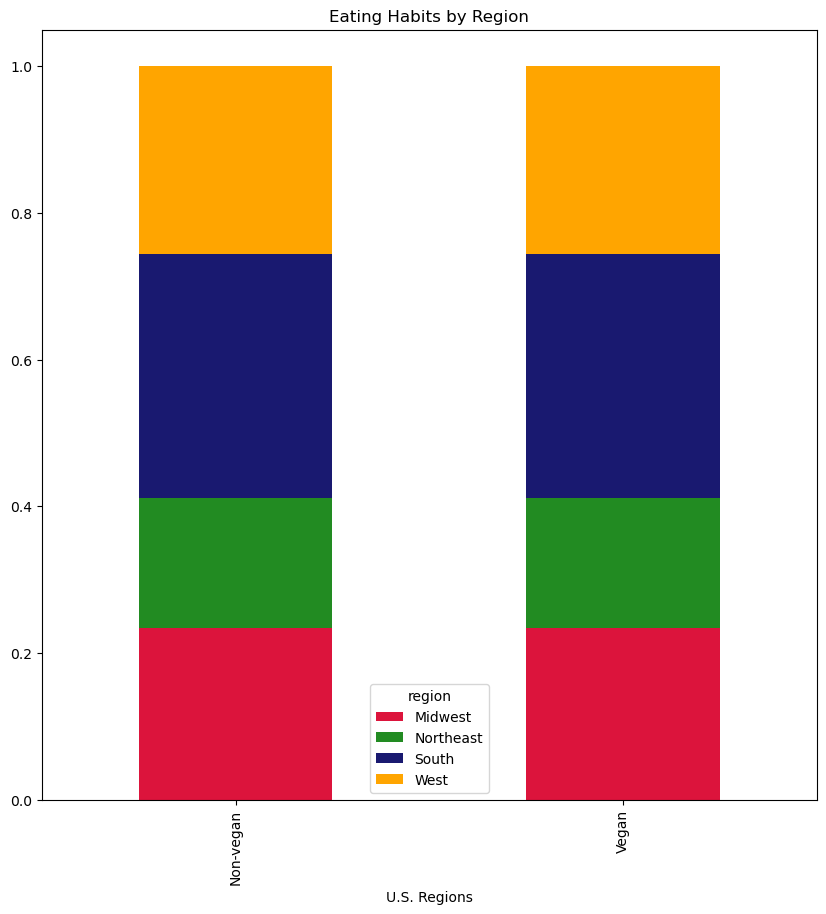

In [52]:
# Create bar chart 6
bar_6 = vegan_region.plot(kind = 'bar', color = ['crimson', 'forestgreen', 'midnightblue', 'orange'], stacked = True, figsize = (10,10))

plt.title('Eating Habits by Region')
plt.xlabel('U.S. Regions')

In [53]:
# Export bar chart
bar_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_6.png'))

### 4. Income / Frequency

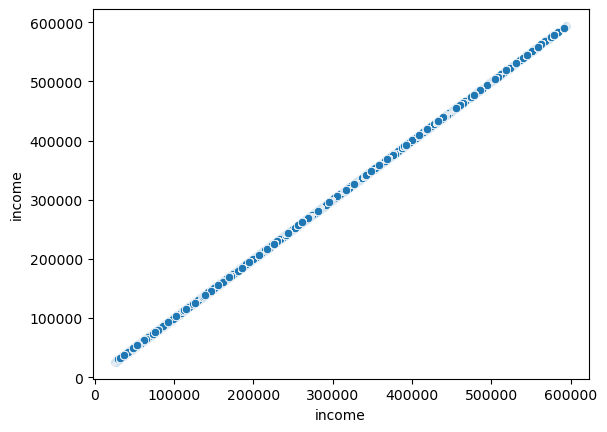

In [54]:
# Create income scatterplot
splot_2 = sns.scatterplot(x = 'income', y = 'income', data = df)

In [55]:
# Export scatterplot
splot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_income.png'))

#### Create if-statement for income

In [56]:
# Condition 1
df.loc[df['income'] <= 40000, 'income_bracket'] = 'Low income'

C:\Users\opetr\AppData\Local\Temp\ipykernel_1580\1036194677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['income'] <= 40000, 'income_bracket'] = 'Low income'


In [57]:
# Condition 2
df.loc[(df['income'] > 40000) & (df['income'] <= 100000), 'income_bracket'] = 'Mid income'

In [58]:
# Condition 3
df.loc[df['income'] > 100000, 'income_bracket'] = 'High income'

In [59]:
# Check output
df['income_bracket'].value_counts(dropna = False)

Mid income     15145511
High income    14207028
Low income      1612025
Name: income_bracket, dtype: int64

In [60]:
# Cross variables
income_frequency = pd.crosstab(df['income_bracket'], df['order_frequency_flag'], normalize = 'index')

Text(0.5, 0, 'Income bracket')

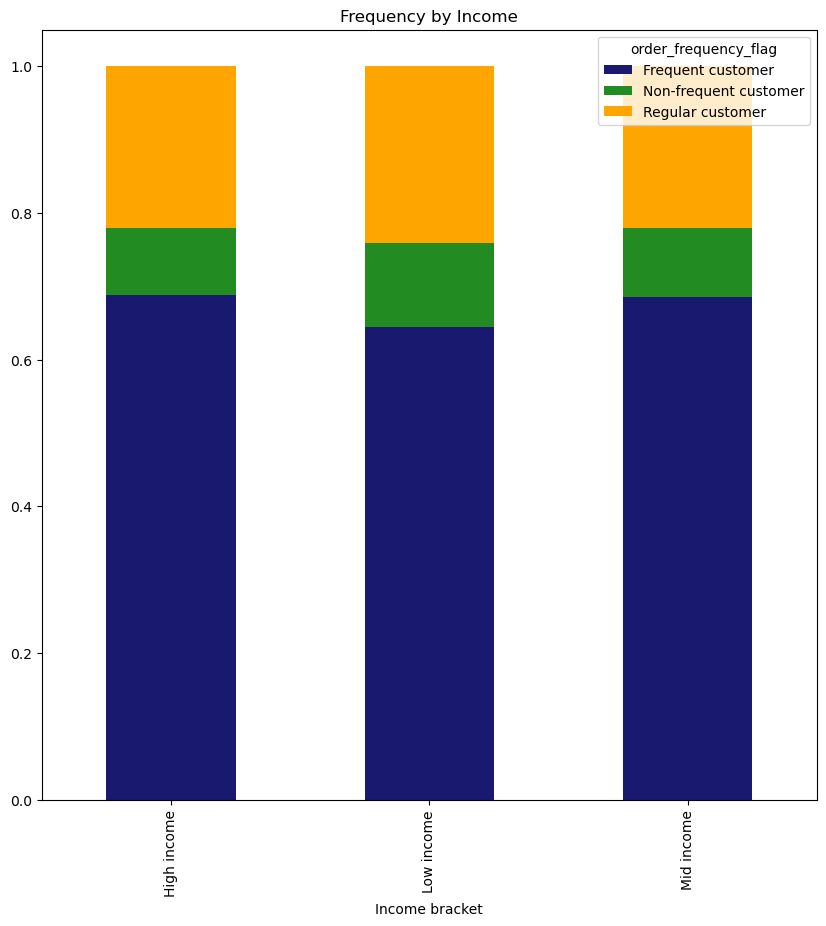

In [61]:
# Create bar chart 7
bar_7 = income_frequency.plot(kind = 'bar', color = ['midnightblue', 'forestgreen', 'orange'], stacked = True, figsize = (10,10))

plt.title('Frequency by Income')
plt.xlabel('Income bracket')

In [62]:
# Export bar chart
bar_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_7.png'))

In [63]:
# Cross variables
income_spending = pd.crosstab(df['spending_flag'], df['income_bracket'], normalize = 'index')

Text(0.5, 0, 'Income bracket')

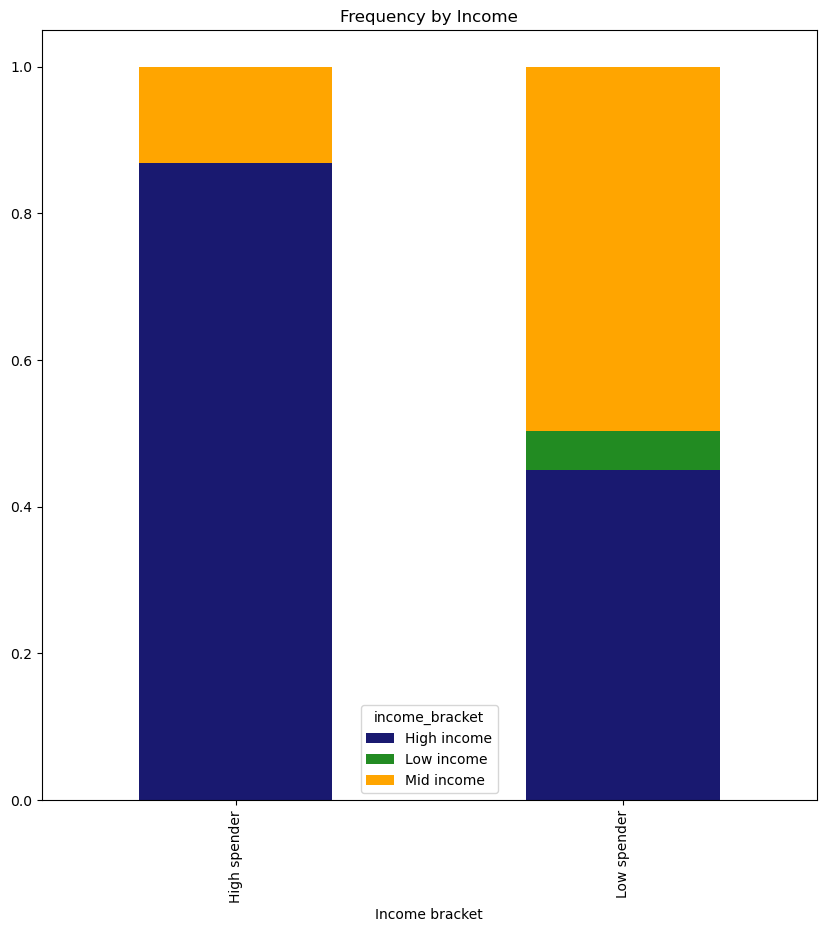

In [64]:
# Create bar chart 8
bar_8 = income_spending.plot(kind = 'bar', color = ['midnightblue', 'forestgreen', 'orange'], stacked = True, figsize = (10,10))

plt.title('Frequency by Income')
plt.xlabel('Income bracket')

In [65]:
# Export bar chart
bar_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_8.png'))

In [66]:
# Cross variables
spending_region = pd.crosstab(df['region'], df['spending_flag'], normalize = 'index')

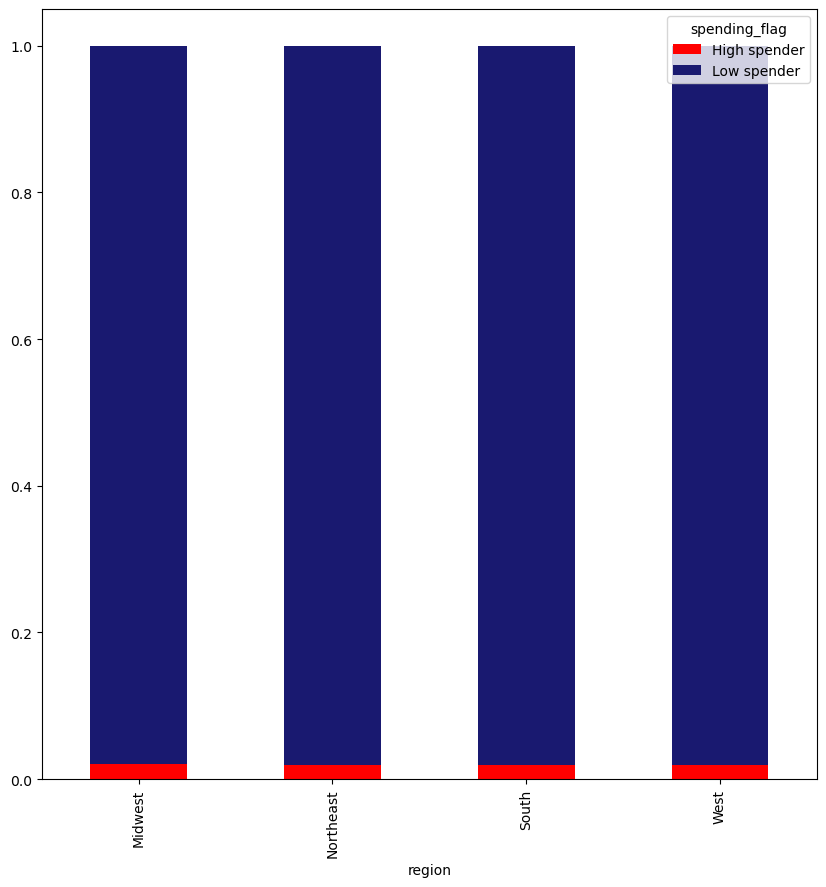

In [67]:
# Create bar chart 9
bar_9 = spending_region.plot(kind = 'bar', color = ['red', 'midnightblue'], stacked = True, figsize = (10,10))

In [68]:
# Export bar chart
bar_9.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_9.png'))

In [69]:
# Cross variables
frequecy_region = pd.crosstab(df['region'], df['order_frequency_flag'], normalize = 'index')

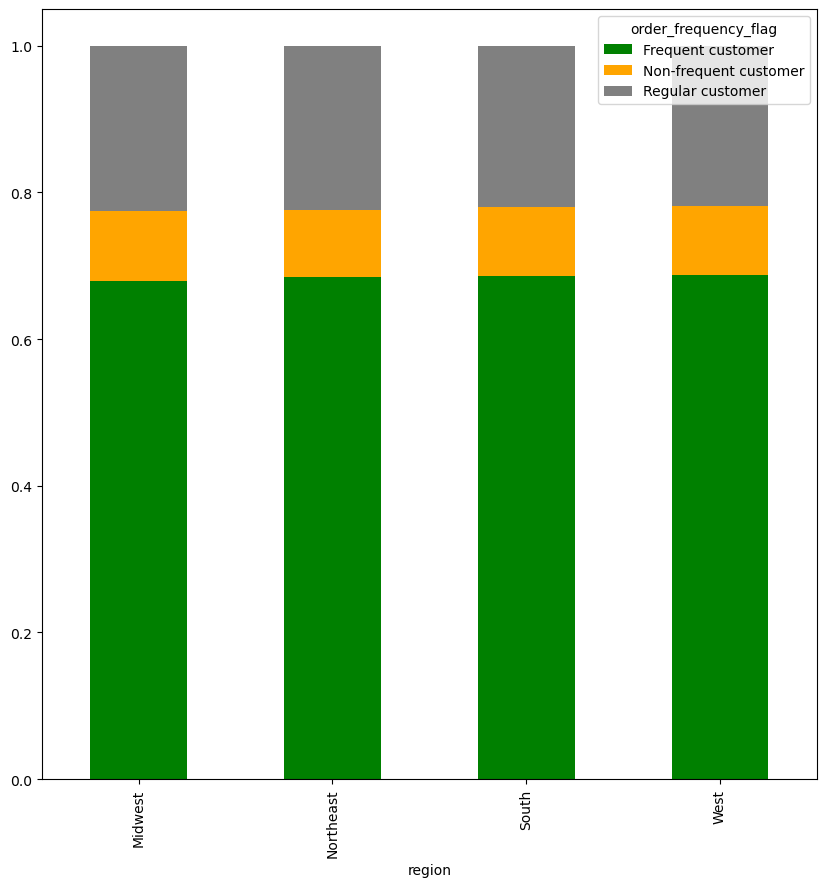

In [70]:
# Create bar chart 10
bar_10 = frequecy_region.plot(kind = 'bar', color = ['green', 'orange', 'gray'], stacked = True, figsize = (10,10))

In [71]:
# Export bar chart 10
bar_10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_10.png'))

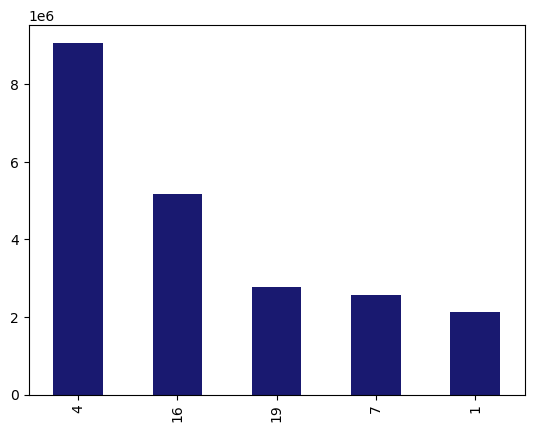

In [72]:
# Create bar chart 11
bar_11 = df['department_id'].value_counts()[:5].plot.bar(color = 'midnightblue')

In [73]:
# Export bar chart 11
bar_11.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_11.png'))

# 6. Aggregations

In [74]:
df.groupby('age_group').agg({'prices':['mean', 'min','max']})

prices              
                mean  min      max
age_group                         
Adult      11.796774  1.0  99999.0
Senior     11.952305  1.0  99999.0
Young      12.444676  1.0  99999.0

In [75]:
df.groupby('income').agg({'prices':['mean', 'min','max']})

prices              
              mean  min      max
income                          
25903     3.375000  1.2      7.4
25911     6.675000  1.4     13.9
25937     6.982051  1.1     14.0
25941     5.677419  1.3     14.3
25955     6.907143  1.1     15.0
...            ...  ...      ...
584097   62.593341  1.0  14900.0
590790  557.922222  1.0  14900.0
591089   92.332386  1.0  14900.0
592409  241.889308  1.1  14900.0
593901   53.976406  1.1  14900.0

[96069 rows x 3 columns]

In [76]:
df.groupby('region').agg({'prices':['mean', 'min','max']})

prices              
                mean  min      max
region                            
Midwest    12.681835  1.0  99999.0
Northeast  11.542582  1.0  99999.0
South      12.118845  1.0  99999.0
West       11.276491  1.0  99999.0

In [77]:
df.groupby('caregiver').agg({'prices':['mean', 'min','max']})

prices              
                mean  min      max
caregiver                         
Caregiver  11.877157  1.0  99999.0
Single     12.102657  1.0  99999.0

In [78]:
df.groupby('spending_flag').agg({'income':['mean', 'min','max']})

income               
                        mean    min     max
spending_flag                              
High spender   208754.316830  41746  593901
Low spender     97507.940356  25903  169997

In [79]:
df.groupby('region').agg({'prices':['mean', 'min','max']})

prices              
                mean  min      max
region                            
Midwest    12.681835  1.0  99999.0
Northeast  11.542582  1.0  99999.0
South      12.118845  1.0  99999.0
West       11.276491  1.0  99999.0

# 7. Export

In [80]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_ANALYSIS_COMPLETED.pkl'))